# Library and Data

In [ ]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, BatchNormalization

/home/jupyter_user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2025-01-30 16:58:52.317644: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-30 16:58:52.319496: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 16:58:52.323915: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 16:58:52.335718: E

In [ ]:
!gdown 1q7Am3_D-AYX4WfPN3dGp5YPNcpgvXxU6

In [ ]:
raw_data = pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Target/Output desired: `loan_status` describes the approval status of loan



# Assessing Data


---

> Null and Duplicates Data

---



In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
raw_data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", raw_data.duplicated().sum())

Jumlah duplikasi:  165



---

> Data Distribution

---



In [ ]:
raw_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


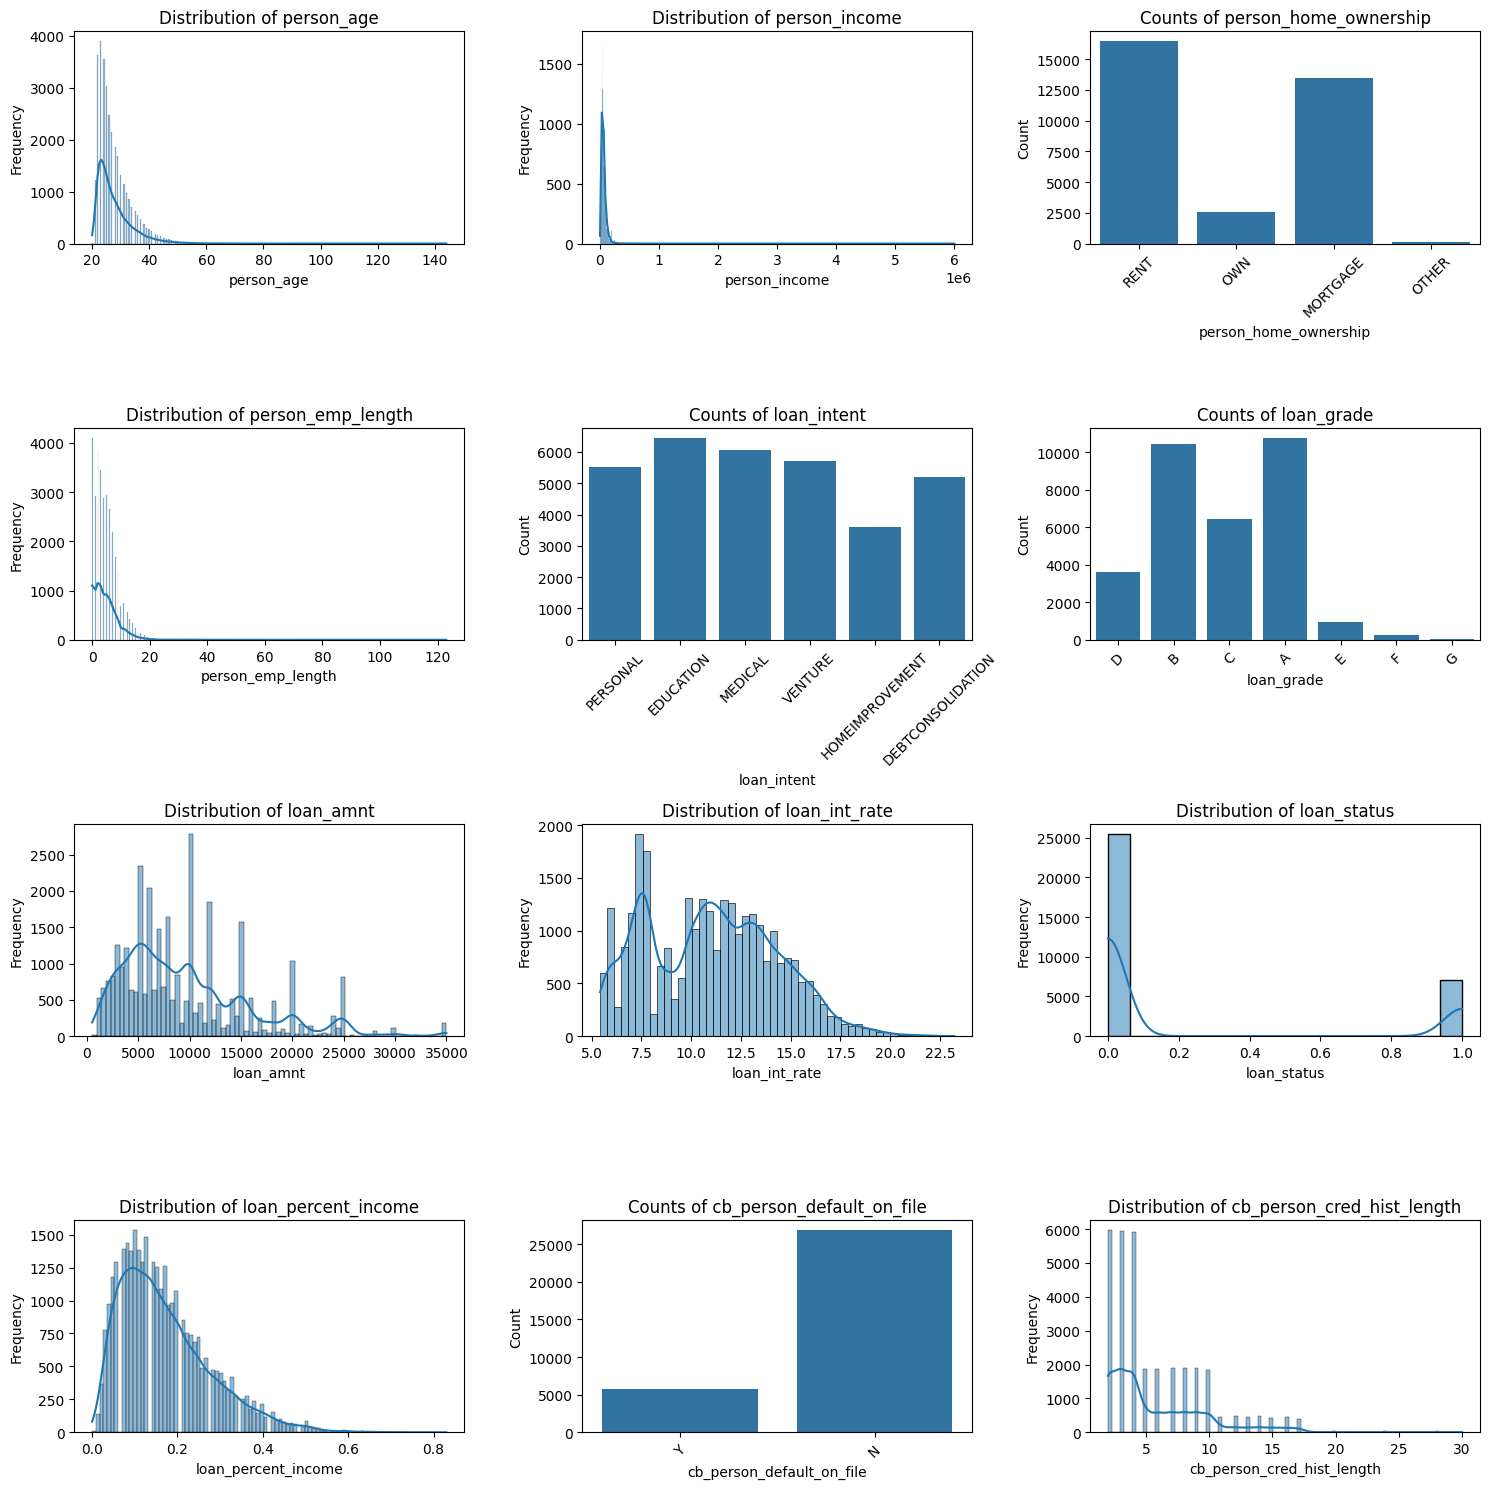

In [ ]:
total_features = raw_data.shape[1]

rows, cols = 4, 3  # 3 x 4 grid
num_plots = rows * cols

# Initialize a figure for subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()  # For easy indexing

# Loop through all features and plot
for idx, column in enumerate(raw_data.columns):
    if idx >= num_plots:
        break

    ax = axes[idx]  # Current subplot

    if raw_data[column].dtype in ['int64', 'float64']:  # Numerical features
        sns.histplot(raw_data[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    elif raw_data[column].dtype == 'object':  # Categorical features
        sns.countplot(x=column, data=raw_data, ax=ax)
        ax.set_title(f'Counts of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


---

> Invalid Data (data that doesn't make sense)

---



In [ ]:
invalid_ages = raw_data[raw_data['person_age'] > 100]
print("People with age above 100(",len(invalid_ages), "data):")
invalid_ages.head()

People with age above 100( 5 data):


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [ ]:
invalid_emp = raw_data[raw_data['person_emp_length'] > 100]
print("People with employment length above 100 (",len(invalid_emp), "data):")
invalid_emp.head()

People with employment length above 100 ( 2 data):


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4



---

> Crucial Data (may disappear not as expected because limited)

---



In [ ]:
raw_data['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [ ]:
crucial_home = raw_data[(raw_data['person_home_ownership'] == 'OTHER') &
              ((raw_data['person_emp_length'].isnull())
              | (raw_data['loan_int_rate'].isnull()))]
print("People with person_home_ownership categorized as 'OTHER' (",len(crucial_home), "data):")
crucial_home.head()

People with person_home_ownership categorized as 'OTHER' ( 13 data):


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2351,26,31992,OTHER,0.0,VENTURE,A,6500,NaN,0,0.20,N,4
10090,22,59000,OTHER,3.0,MEDICAL,D,12000,NaN,1,0.20,Y,3
10100,22,59000,OTHER,1.0,DEBTCONSOLIDATION,D,15000,NaN,1,0.25,Y,2
12012,22,78000,OTHER,4.0,PERSONAL,B,5600,NaN,0,0.07,N,2
13835,23,96000,OTHER,3.0,EDUCATION,E,12000,NaN,0,0.13,Y,2


In [ ]:
raw_data['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [ ]:
crucial_grade = raw_data[((raw_data['loan_grade'] == 'E') | (raw_data['loan_grade'] == 'F')
                          | (raw_data['loan_grade'] == 'G'))
                          & ((raw_data['person_emp_length'].isnull())
                          | (raw_data['loan_int_rate'].isnull()))]
print("People with crucial_grade categorized as 'E', 'F', and 'G' (",len(crucial_grade), "data):")
crucial_grade.head()

People with crucial_grade categorized as 'E', 'F', and 'G' ( 131 data):


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
188,24,60000,RENT,2.0,DEBTCONSOLIDATION,E,25000,NaN,1,0.42,Y,2
447,22,98000,RENT,7.0,DEBTCONSOLIDATION,F,24000,NaN,1,0.24,Y,2
504,22,66000,RENT,1.0,EDUCATION,F,22000,NaN,1,0.33,N,2
600,24,45000,RENT,8.0,MEDICAL,E,20000,NaN,1,0.44,N,2


# Cleaning

In [ ]:
raw_data = raw_data.dropna() #Drop Null
raw_data = raw_data.drop_duplicates() #Drop duplicates
raw_data = raw_data[raw_data['person_age'] <= 100] #Drop invalid
raw_data = raw_data[raw_data['person_emp_length'] <= 120] #Drop invalid
print("Data after dropping (null, duplicates, logically invalid):", len(raw_data), "data")

Data after dropping (null, duplicates, logically invalid): 28495 data


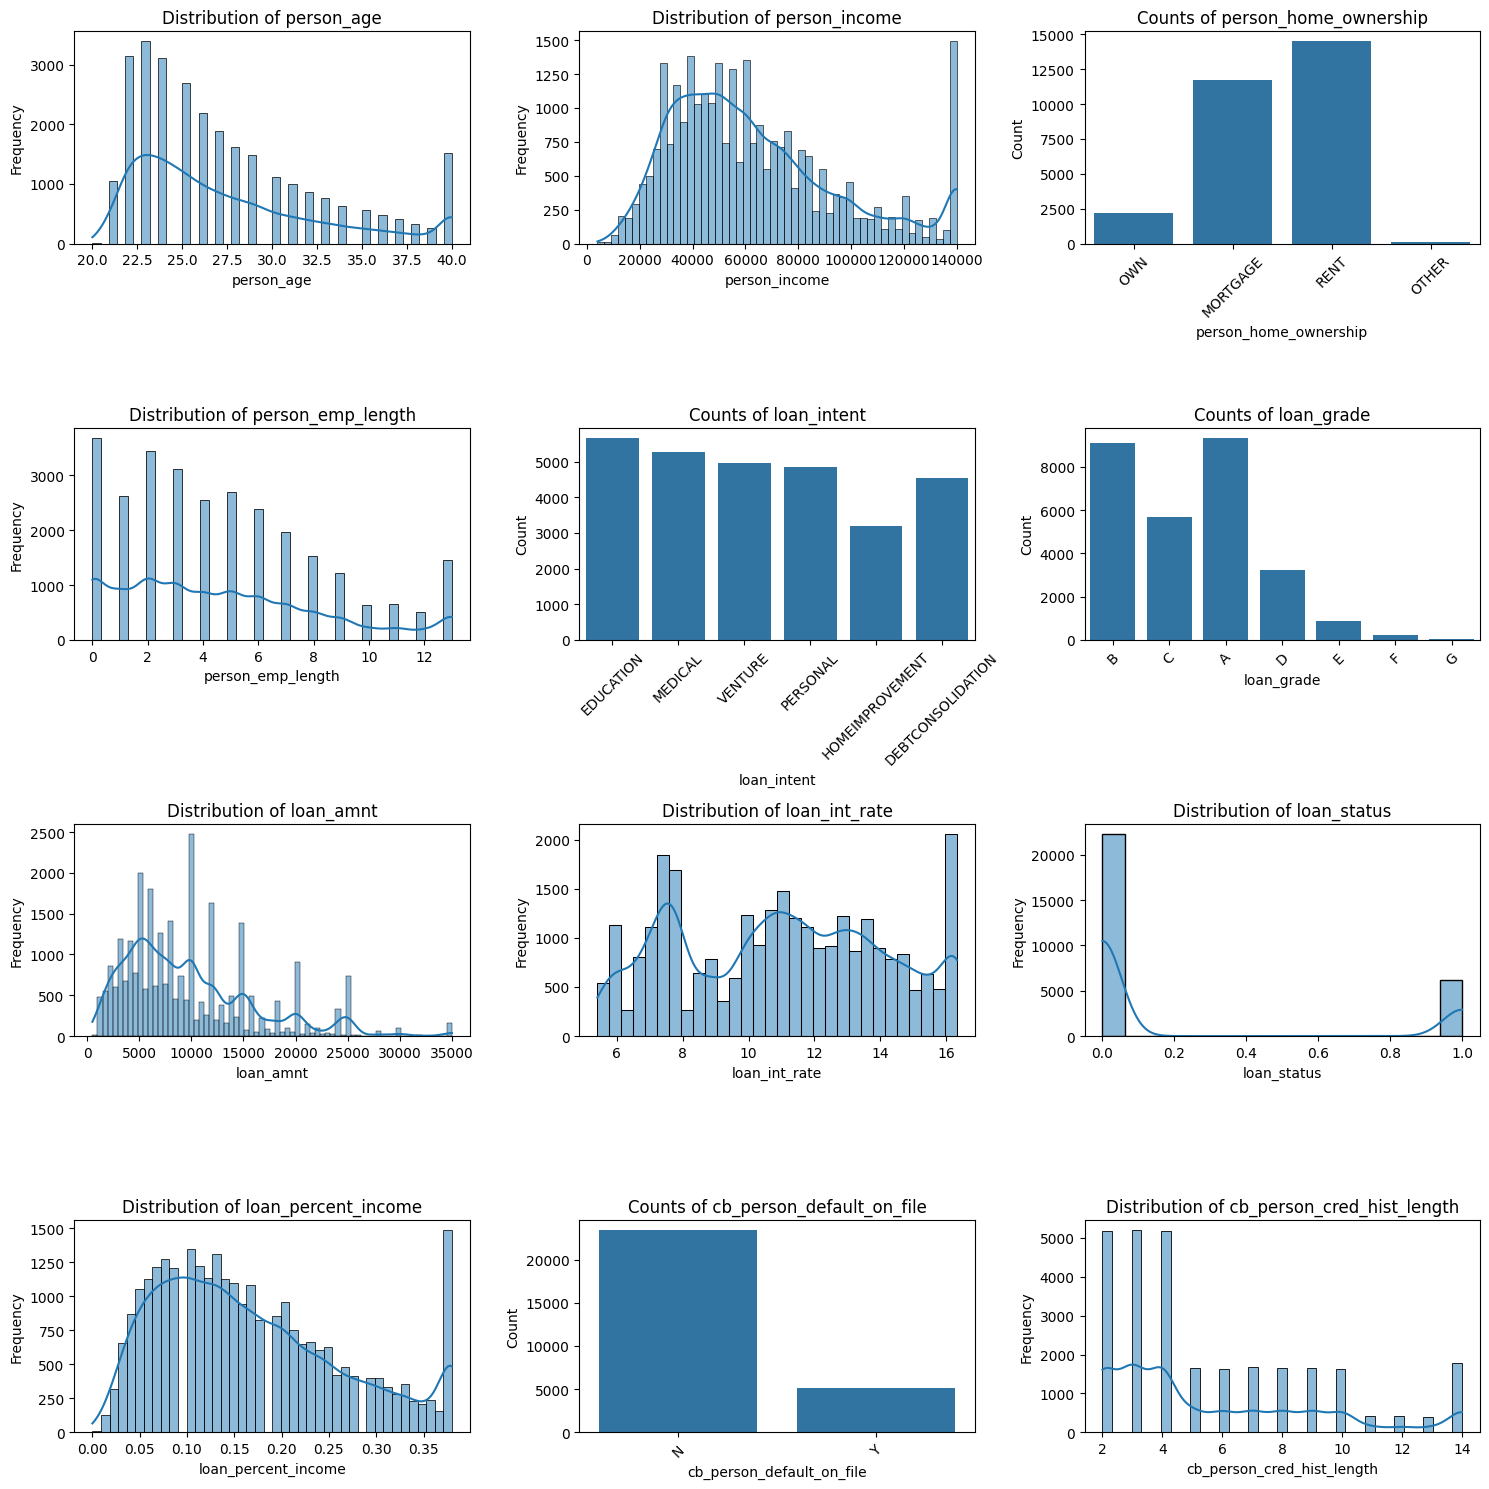

In [ ]:
total_features = raw_data.shape[1]

rows, cols = 4, 3  # 3 x 4 grid
num_plots = rows * cols

# Initialize a figure for subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()  # For easy indexing

# Loop through all features and plot
for idx, column in enumerate(raw_data.columns):
    if idx >= num_plots:
        break

    ax = axes[idx]  # Current subplot

    if raw_data[column].dtype in ['int64', 'float64']:  # Numerical features
        sns.histplot(raw_data[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    elif raw_data[column].dtype == 'object':  # Categorical features
        sns.countplot(x=column, data=raw_data, ax=ax)
        ax.set_title(f'Counts of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
columns_to_winsorize = ['person_age', 'person_income', 'person_emp_length',
                        'loan_int_rate', 'loan_percent_income',
                        'cb_person_cred_hist_length'] #Numerical features that is too skewed

for col in columns_to_winsorize:
    raw_data[col] = winsorize(raw_data[col], limits=[0, 0.05]) # Winsorize top 5%
print("Data after winsorization (outlier handling):", len(raw_data), "data")

Data after winsorization (outlier handling): 28495 data


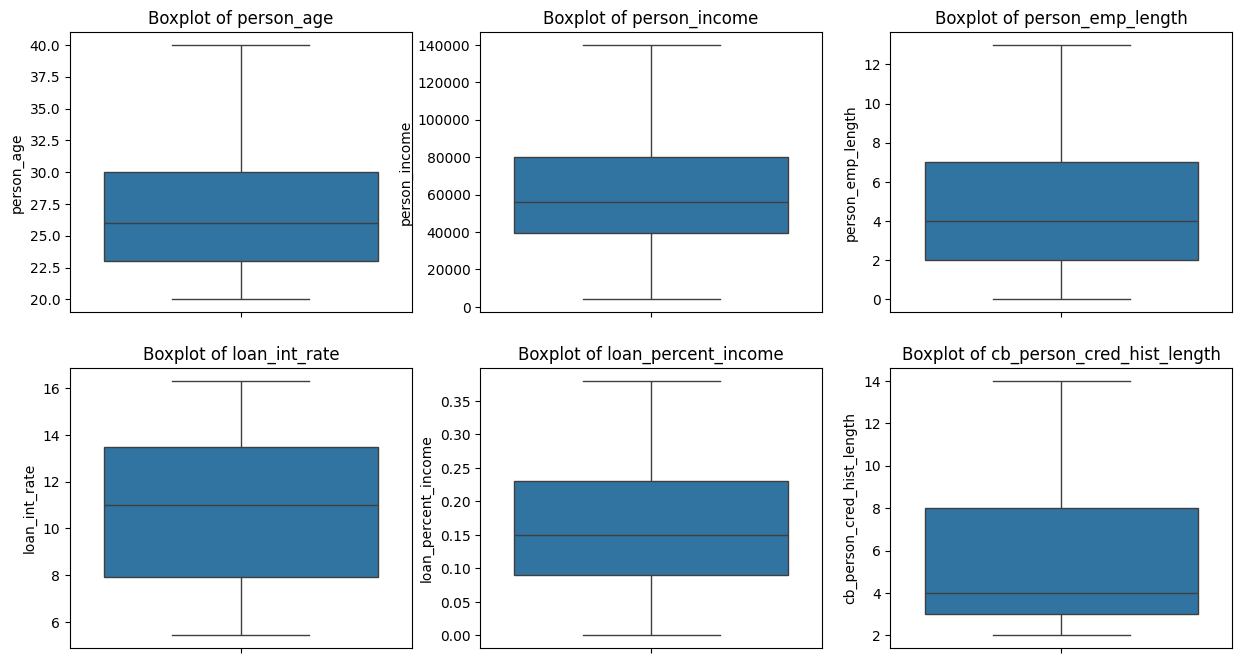

In [ ]:
columns_to_plot = ['person_age', 'person_income', 'person_emp_length',
                   'loan_int_rate', 'loan_percent_income',
                   'cb_person_cred_hist_length']

rows, cols = 2, 3  # 2 x 3 grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()  # For indexing

# Loop through columns and plot
for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]
    sns.boxplot(y=raw_data[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel(column)

# Show the plots
plt.show()

# Feature Preparation

In [ ]:
train, test = train_test_split(raw_data, test_size=0.13, random_state=24, shuffle=True)
train, val = train_test_split(train, test_size=0.15, random_state=24, shuffle=True)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

21071 train examples
3719 validation examples
3705 test examples


In [ ]:
x_train = train.drop(columns=['loan_status'])
y_train = train['loan_status']
x_val = val.drop(columns=['loan_status'])
y_val = val['loan_status']
x_test = test.drop(columns=['loan_status'])
y_test = test['loan_status']

In [ ]:
x_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
23148,35,60000,MORTGAGE,12.0,DEBTCONSOLIDATION,C,25000,12.73,0.38,N,8
7028,22,72000,RENT,4.0,PERSONAL,A,6200,5.99,0.09,N,2
25915,29,92000,MORTGAGE,8.0,PERSONAL,B,10000,11.26,0.11,N,9
15507,23,140000,MORTGAGE,3.0,PERSONAL,D,15000,15.58,0.11,Y,3
10898,22,45000,RENT,3.0,PERSONAL,E,10000,16.32,0.22,Y,2



---

> Scaling

---



In [ ]:
numerical_features = x_train.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()

x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])

joblib.dump(scaler, 'train_scaler.pkl') # Save the trained scaler

x_val[numerical_features] = scaler.transform(x_val[numerical_features])
x_test[numerical_features] = scaler.transform(x_test[numerical_features])


---

> SMOTE (imbalance handling)

---



In [ ]:
categorical_features_indices = [x_train.columns.get_loc(col) for col
                                in x_train.select_dtypes(include=['object']).columns]

#SMOTENC for handling both categorical and numerical features
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)

x_train_resampled, y_train_resampled = smote_nc.fit_resample(x_train, y_train)

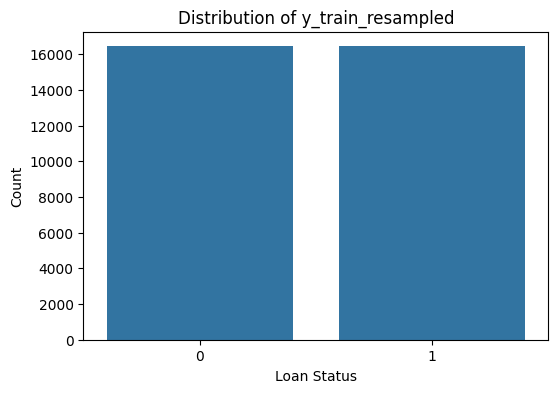

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of y_train_resampled')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Modeling

In [ ]:
# Define categorical features and numerical features
categorical_features = x_train_resampled.select_dtypes(include=['object']).columns
numerical_features = x_train_resampled.select_dtypes(include=['number']).columns

# Vocabulary sizes (category available) for each categorical features
vocab_sizes = {
    'person_home_ownership': 4,
    'loan_intent': 6,
    'loan_grade': 7,
    'cb_person_default_on_file': 2
}

# Embedding dimensions
embedding_dims = {feature: (vocab_sizes[feature] + 1) // 2 for feature in categorical_features}

# Input layers
categorical_inputs = {feature: Input(shape=(1,), name=f"{feature}_input") for feature in categorical_features}
numerical_input = Input(shape=(len(numerical_features),), name="numerical_input")

# Embedding layers for categorical inputs
embedded_layers = []
for feature in categorical_features:
    embedding_layer = Embedding(input_dim=vocab_sizes[feature] + 1,  # +1 for padding token
                                output_dim=embedding_dims[feature],
                                name=f"{feature}_embedding")(categorical_inputs[feature])
    flattened_layer = Flatten()(embedding_layer)
    embedded_layers.append(flattened_layer)

# Concatenate embeddings and numerical inputs
concatenated_inputs = Concatenate(name="concatenated_inputs")(
    embedded_layers + [numerical_input]
)

# Encoder part (dimensionality reduction)
encoding_dim = 5  # Desired dimension after reduction
encoded = Dense(encoding_dim, activation='relu', name="encoded")(concatenated_inputs)

# Neural network
hidden_layer1 = Dense(64, activation='relu', name="hidden_layer1")(encoded)
hidden_layer1 = Dropout(0.3)(hidden_layer1)
hidden_layer1 = BatchNormalization()(hidden_layer1)

hidden_layer2 = Dense(80, activation='relu', name="hidden_layer2")(hidden_layer1)

hidden_layer3 = Dense(64, activation='relu', name="hidden_layer3")(hidden_layer2)

output = Dense(1, activation='sigmoid', name="output")(hidden_layer3)

# Build the complete model
model = Model(inputs=[*categorical_inputs.values(), numerical_input], outputs=output, name="Unified_Model")
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01713198957798819,
                                              beta_1=0.9,
                                              beta_2=0.991,
                                              amsgrad=True,
                                              use_ema=True,
                                              ema_momentum=0.6),
                loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

2025-01-30 17:20:05.863565: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "Unified_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ person_home_owners… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ loan_intent_input   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ loan_grade_input    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cb_person_default_… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ person_home_owners… │ (None, 1, 2)      │         10 │ person_home_owne… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ loan_intent_embedd… │ (None, 1, 3)      │         21 │ loan_intent_inpu… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ loan_grade_embeddi… │ (None, 1, 4)      │         32 │ loan_grade_input… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cb_person_default_… │ (None, 1, 1)      │          3 │ cb_person_defaul… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2)         │          0 │ person_home_owne… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3)         │          0 │ loan_intent_embe… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 4)         │          0 │ loan_grade_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1)         │          0 │ cb_person_defaul… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_input     │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenated_inputs │ (None, 17)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0],  │
│                     │                   │            │ numerical_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoded (Dense)     │ (None, 5)         │         90 │ concatenated_inp… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_layer1       │ (None, 64)        │        384 │ encoded[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ hidden_layer1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 64)        │        256 │ dropout[0][0]   

 Total params: 11,245 (43.93 KB)

 Trainable params: 11,117 (43.43 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
label_encoders = {}
for col in categorical_features: #This will change the category into integer form
    le = LabelEncoder()
    x_train_resampled[col] = le.fit_transform(x_train_resampled[col])
    label_encoders[col] = le
    x_val[col] = le.transform(x_val[col])
    x_test[col] = le.fit_transform(x_test[col])
joblib.dump(label_encoders, 'label_encoders.pkl') #Save the label encoder

# Convert categorical and numerical data into a format suitable for training
train_inputs = {f"{feature}_input": x_train_resampled[feature].values.reshape(-1, 1) for feature in categorical_features} # Reshape to (None, 1)
train_inputs["numerical_input"] = x_train_resampled[numerical_features].values

val_inputs = {f"{feature}_input": x_val[feature].values.reshape(-1, 1) for feature in categorical_features} # Reshape to (None, 1)
val_inputs["numerical_input"] = x_val[numerical_features].values

test_inputs = {f"{feature}_input": x_test[feature].values.reshape(-1, 1) for feature in categorical_features} # Reshape to (None, 1)
test_inputs["numerical_input"] = x_test[numerical_features].values


---

> Model training

---



In [ ]:
# Train the model
history = model.fit(train_inputs, y_train_resampled,
                    validation_data=(val_inputs, y_val),
                    epochs=25, batch_size=32, verbose=2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_inputs, y_test)
print(f"\n Test Accuracy: {test_accuracy:.2f}")

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['person_home_ownership_input', 'loan_intent_input', 'loan_grade_input', 'cb_person_default_on_file_input', 'numerical_input']. Received: the structure of inputs={'person_home_ownership_input': '*', 'loan_intent_input': '*', 'loan_grade_input': '*', 'cb_person_default_on_file_input': '*', 'numerical_input': '*'}
  warnings.warn(


1027/1027 - 5s - 5ms/step - accuracy: 0.7341 - loss: 0.5090 - val_accuracy: 0.7881 - val_loss: 0.5306
Epoch 2/25
1027/1027 - 2s - 2ms/step - accuracy: 0.7370 - loss: 0.4884 - val_accuracy: 0.8658 - val_loss: 0.4358
Epoch 3/25
1027/1027 - 2s - 2ms/step - accuracy: 0.7350 - loss: 0.4844 - val_accuracy: 0.8591 - val_loss: 0.4351
Epoch 4/25
1027/1027 - 2s - 2ms/step - accuracy: 0.7392 - loss: 0.4829 - val_accuracy: 0.8645 - val_loss: 0.5125
Epoch 5/25
1027/1027 - 2s - 2ms/step - accuracy: 0.7386 - loss: 0.4812 - val_accuracy: 0.8427 - val_loss: 0.4525
Epoch 6/25
1027/1027 - 2s - 2ms/step - accuracy: 0.7394 - loss: 0.4799 - val_accuracy: 0.8615 - val_loss: 0.4220
Epoch 7/25
1027/1027 - 2s - 2ms/step - accuracy: 0.7420 - loss: 0.4768 - val_accuracy: 0.8666 - val_loss: 0.4471
Epoch 8/25
1027/1027 - 2s - 2ms/step - accuracy: 0.7403 - loss: 0.4758 - val_accuracy: 0.8712 - val_loss: 0.4376
Epoch 9/25
1027/1027 - 2s - 2ms/step - accuracy: 0.7399 - loss: 0.4772 - val_accuracy: 0.6827 - val_loss: 0

In [ ]:
model.save('model.h5') #Saving trained model


---

> User input example

---



In [ ]:
###### Load the trained scaler
scaler = joblib.load('train_scaler.pkl')

# Load the label encoders
label_encoders = joblib.load('label_encoders.pkl')

# Load the saved model
model = load_model('model.h5')

# Input data
person_age = float(input("Enter person's age: "))
person_income = float(input("Enter person's income: "))
person_emp_length = float(input("Enter person's employment length: "))
loan_amnt = float(input("Enter loan amount: "))
loan_int_rate = float(input("Enter loan interest rate: "))
loan_percent_income = float(input("Enter loan percent of income: "))
cb_person_cred_hist_length = float(input("Enter credit history length: "))
person_home_ownership = input("Enter person's home ownership (RENT, MORTGAGE, OWN, OTHER): ")
loan_intent = input("Enter loan intent (EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT): ")
loan_grade = input("Enter loan grade (A, B, C, D, E, F, G): ")
cb_person_default_on_file = input("Enter person's default history (Y, N): ")

# DataFrame for the input data
input_data = pd.DataFrame({
    'person_age': [person_age],
    'person_income': [person_income],
    'person_emp_length': [person_emp_length],
    'loan_amnt': [loan_amnt],
    'loan_int_rate': [loan_int_rate],
    'loan_percent_income': [loan_percent_income],
    'cb_person_cred_hist_length': [cb_person_cred_hist_length],
    'person_home_ownership': [person_home_ownership],
    'loan_intent': [loan_intent],
    'loan_grade': [loan_grade],
    'cb_person_default_on_file': [cb_person_default_on_file]
})

# Define categorical features and numerical features
numerical_features = ['person_age', 'person_income', 'person_emp_length',
                      'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                      'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade',
                        'cb_person_default_on_file']

# Scaling numerical features
input_data[numerical_features] = scaler.transform(input_data[numerical_features])

# Encode categorical features
for col in categorical_features:
    input_data[col] = label_encoders[col].transform(input_data[col])

# Prepare the input data for the model
input_dict = {f"{feature}_input": input_data[feature].values.reshape(-1, 1) for feature in categorical_features}
input_dict["numerical_input"] = input_data[numerical_features].values

# Make a prediction
prediction = model.predict(input_dict)
print(f"Prediction: {prediction[0][0]}")
threshold = 0.5 #Based on binary problem
predicted_class = 1 if prediction[0][0] >= threshold else 0
print(f"Predicted class: {predicted_class}")

Enter person's age:  31
Enter person's income:  50000
Enter person's employment length:  20
Enter loan amount:  55000
Enter loan interest rate:  13.31
Enter loan percent of income:  0.67
Enter credit history length:  1
Enter person's home ownership (RENT, MORTGAGE, OWN, OTHER):  OWN
Enter loan intent (EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT):  MEDICAL
Enter loan grade (A, B, C, D, E, F, G):  C
Enter person's default history (Y, N):  N


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction: 0.4725343883037567
Predicted class: 0


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['person_home_ownership_input', 'loan_intent_input', 'loan_grade_input', 'cb_person_default_on_file_input', 'numerical_input']. Received: the structure of inputs={'person_home_ownership_input': '*', 'loan_intent_input': '*', 'loan_grade_input': '*', 'cb_person_default_on_file_input': '*', 'numerical_input': '*'}
  warnings.warn(
